In [1]:
import numpy as np
from scipy import stats
import math
import random
import matplotlib.pyplot as plt

### Intro

Let's take a look at a beginner-friednly stochastic process: the _simple random walk_.

We define a varible $Y_{i}$ that takes either the value +1 with probability $p$ or -1 with probability $q = 1 - p$.

Let's take look at a sum (maybe think CLT already) of k realizations of the r.v. $Y_{i}$.

Define $X_{k} = \sum_{i=1}^{k}Y_{i}$. It can be computed that:
$E[X_{k}] = k(2p-1)$ and $Var[X_{k}] = 4kp(1-p)$.

Also, when assuming big values of k CLT kicks in. This means that: $X \sim N(k(2p-1), \sqrt{4kp(1-p)})$

Let's analize a special case when $p = q = \frac{1}{2}$: $X_{k} \sim N(0, \sqrt{k})$

### Point of the experiment

We are going to generate many different realizations of $X_{k}$ and look at the distribution of the sample mean and sample variance to see if they are indeed as predicted above.

The result of each simulation is going to be stored in a column vector: $v_{1} = (Y_{1,1}, Y_{1,2}, ..., Y_{1,k})$. All the simulations $v_{1}$ up to $v_{n}$ are going to be stored in a matrix $S_{mxk}$

### Setting up

In [2]:
# Rows (number of simulations of X_{k})
m = 10**4
# Columns (number of realizations of Y_{i})
k = 10**2

a = 0
b = 1

S = np.zeros((m, k))
X = np.zeros(m)

mean = np.zeros(m)
std = np.zeros(m)

### Simulations

In [3]:
def y_i(p, threshold = 1/2):
    """
    Helper function. Returns either +1 with probability p or -1 with probability q = 1-p.
    """
    if p <= threshold:
        return 1
    else:
        return -1

In [4]:
for i in range(0, m):
    for j in range(0, k):
        p = random.uniform(a, b)
        S[i, j] = y_i(p)
        
    X[i] = np.sum(S[i,:])

### Results

So, we generated $m = 10000$ different paths for $X_{k}$, where $k = 100$.

We expect to have bell-shaped distribution with $\mu = 0$ and $\sigma = 10$ for $X_{k}$.

(array([   7.,   18.,   84.,  175.,  400.,  664., 1076., 1345., 1548.,
        1507., 1279.,  890.,  512.,  307.,  127.,   44.,   13.,    4.]),
 array([-36.        , -31.88888889, -27.77777778, -23.66666667,
        -19.55555556, -15.44444444, -11.33333333,  -7.22222222,
         -3.11111111,   1.        ,   5.11111111,   9.22222222,
         13.33333333,  17.44444444,  21.55555556,  25.66666667,
         29.77777778,  33.88888889,  38.        ]),
 <BarContainer object of 18 artists>)

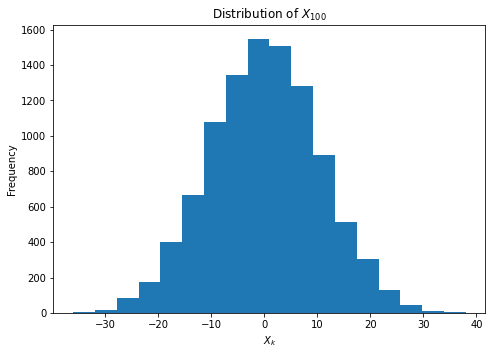

In [13]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])


ax.set_title("Distribution of $X_{100}$")
ax.set_xlabel("$X_{k}$")
ax.set_ylabel("Frequency")

ax.hist(X, bins = 18)